
# Лабораторная работа 3
## Метрические методы классификации

In [2]:
import pandas as pd
import numpy as np

data_source = 'datasets/Raisin/Raisin_Dataset.data'
d = pd.read_table(data_source, delimiter=';', 
                  header=None, 
                  names=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 
                         'Eccentricity', 'ConvexArea', 'Extent', 'answer'])

d.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,answer
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   Perimeter        900 non-null    float64
 2   MajorAxisLength  900 non-null    float64
 3   MinorAxisLength  900 non-null    float64
 4   Eccentricity     900 non-null    int64  
 5   ConvexArea       900 non-null    float64
 6   Extent           900 non-null    float64
 7   answer           900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


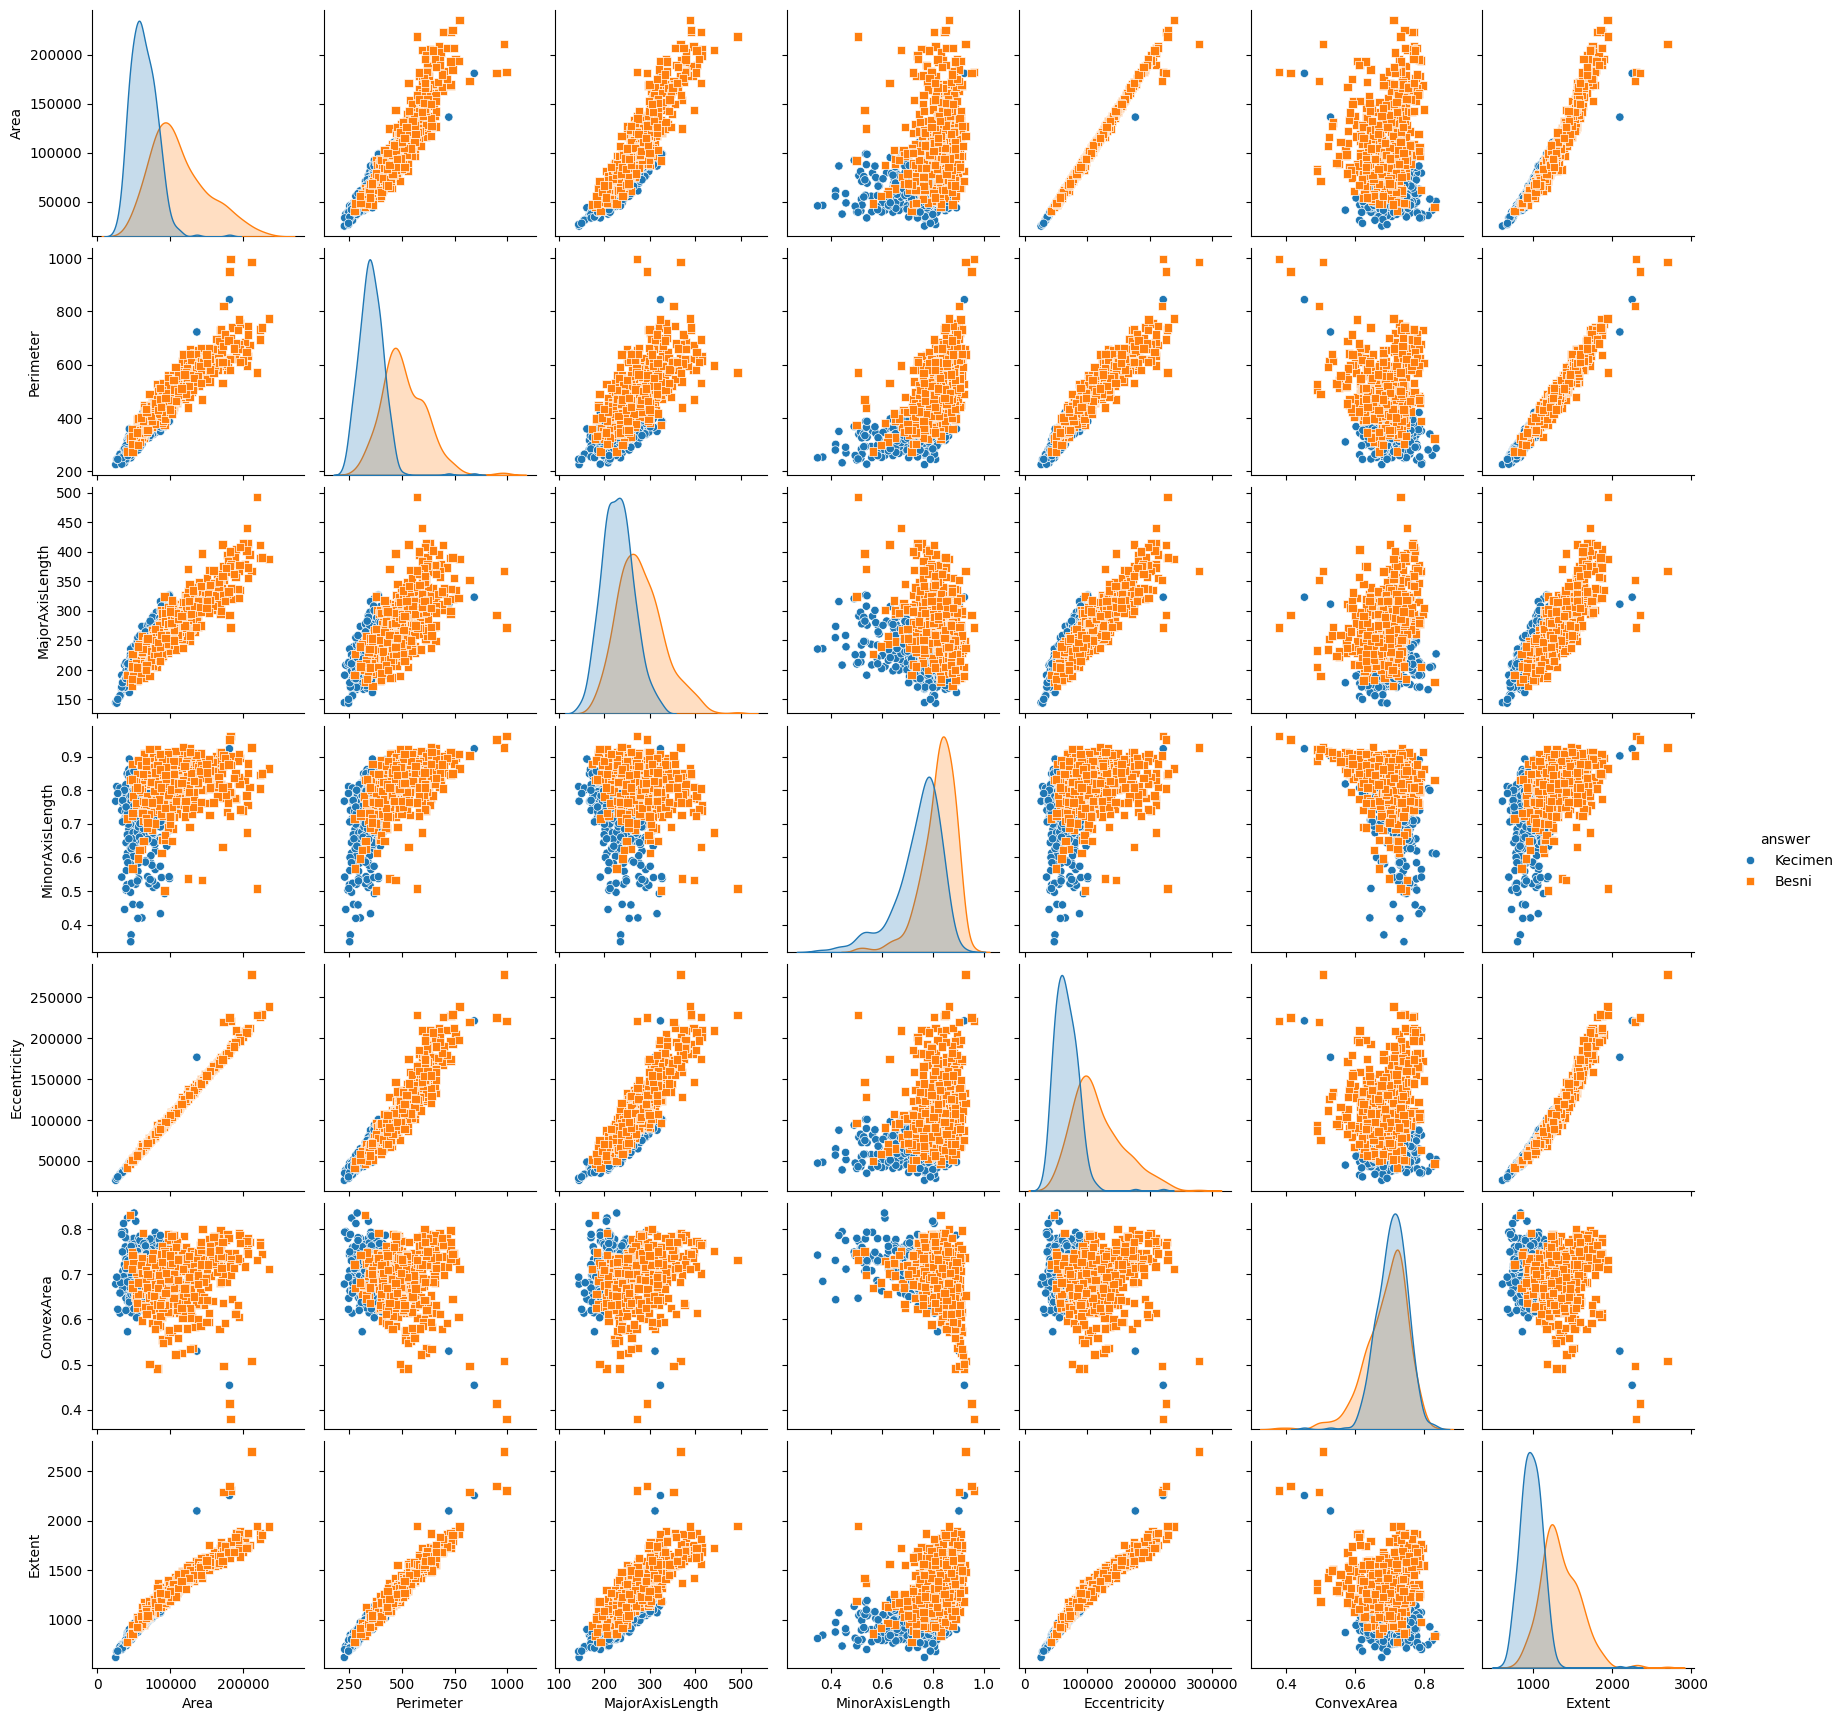

In [4]:
import seaborn as sb
%matplotlib inline
sb.pairplot(d, hue='answer', markers=["o", "s"])


In [5]:
from sklearn.neighbors import KNeighborsClassifier

X = d[['Area', 'Perimeter','Extent']]
y = d['answer']

K = 3

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# построение модели классификатора (процедура обучения)
knn.fit(X, y)

# Использование классификатора
# Объявление признаков объекта
X_test = np.array([[503.0, 400.0, 600.0]])
# Получение ответа для нового объекта
target = knn.predict(X_test)
print(target)


['Kecimen']


c:\Users\nrg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_holdout, y_train, y_holdout = \
            train_test_split(X, 
                             y, 
                             test_size=0.3, 
                             random_state=17)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_holdout)
accur = accuracy_score(y_holdout, knn_pred)
print('accuracy: ', accur)

accuracy:  0.7185185185185186


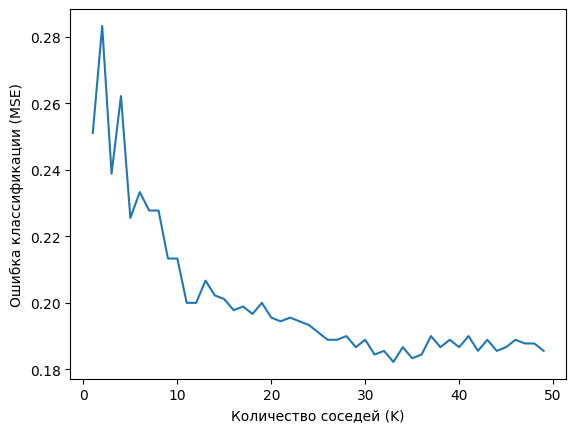

Оптимальные значения K:  [33]
K с минимальной ошибкой:  33


In [7]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Значения параметра K
k_list = list(range(1,50))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for K in k_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(k_list, MSE)
plt.xlabel('Количество соседей (K)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
k_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_k_min = []
for i in range(len(MSE)):
    if MSE[i] <= k_min:
        all_k_min.append(k_list[i])

# печатаем все K, оптимальные для модели
print('Оптимальные значения K: ', all_k_min)
print('K с минимальной ошибкой: ', min(all_k_min))


C:\Users\nrg\AppData\Local\Temp\ipykernel_7216\4148047944.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
C:\Users\nrg\AppData\Local\Temp\ipykernel_7216\4148047944.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(fmin[j], fmax[j], plot_step))
c:\Users\nrg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\nrg\AppData\Local\Temp\ipykernel_7216\4148047944.py:20: FutureWarning: Series.

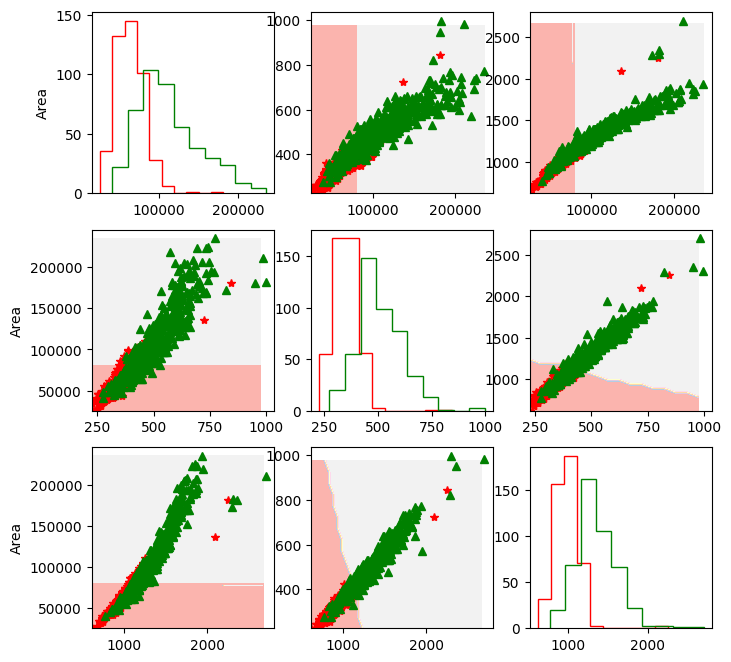

In [8]:
dX = X
dy = y

plot_markers = ['r*', 'g^']
answers = dy.unique()

# Создаем подграфики для каждой пары признаков
f, places = plt.subplots(3, 3, figsize=(8,8))

fmin = dX.min()-0.5
fmax = dX.max()+0.5
plot_step = 50

# Обходим все subplot
for i in range(0,3):
    for j in range(0,3):

        # Строим решающие границы 
        if(i != j):
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                               np.arange(fmin[j], fmax[j], plot_step))
            model = KNeighborsClassifier(n_neighbors=33)
            model.fit(dX.iloc[:, [i,j]], dy)
            
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
                
            p = p.reshape(xx.shape)
            p[p==answers[0]] = 0
            p[p==answers[1]] = 1
            places[i,j].contourf(xx, yy, p.astype(float), cmap='Pastel1') 
      
        # Обход всех классов
        for id_answer in range(len(answers)):
            idx = np.where(dy == answers[id_answer])
            if i==j:
                places[i, j].hist(dX.iloc[idx].iloc[:,i],
                                  color=plot_markers[id_answer][0],
                                 histtype = 'step')
            else:
                places[i, j].plot(dX.iloc[idx].iloc[:,i], dX.iloc[idx].iloc[:,j], 
                                  plot_markers[id_answer], 
                                  label=answers[id_answer], markersize=6)
        
        if j==0:
            places[i, j].set_ylabel(dX.columns[j])
        
        if i==3:
            places[i, j].set_xlabel(dX.columns[i])
